# Rossmo's Formula

This notebook is implementation of rossmo's formula. Inspired to implement it in python after watching the first episode of Numb3rs.

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/ace3b0799c2348656129a0180f4b5571fc005ec5)

![iamge](https://wikimedia.org/api/rest_v1/media/math/render/svg/12806adad484cedef74aa73f41c6809e6d806d60)

In [246]:
import json
import math
from typing import List, Dict, Any, Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [106]:
def rossmo_formula(k: int, f: int, g: int, b: int, crimes:List[Tuple[int]], imax: int, jmax: int) -> Dict[str, Any]:
    output_map = np.zeros((imax, jmax), dtype=int)
    step = 1
    j = 0
    while j < jmax:
        i=0
        while i < imax:
            crimes_sum = 0
            for crime in crimes:
                distance = abs(j - crime[0]) + abs(i - crime[1])
                if distance > b:
                    crimes_sum += 1/math.pow(distance, f)
                else:
                    crimes_sum += math.pow(b, g-f)/math.pow(2*b - distance, g)
            pij = k * crimes_sum
            output_map[i][j] = pij
            i += step
        j += step
    return output_map

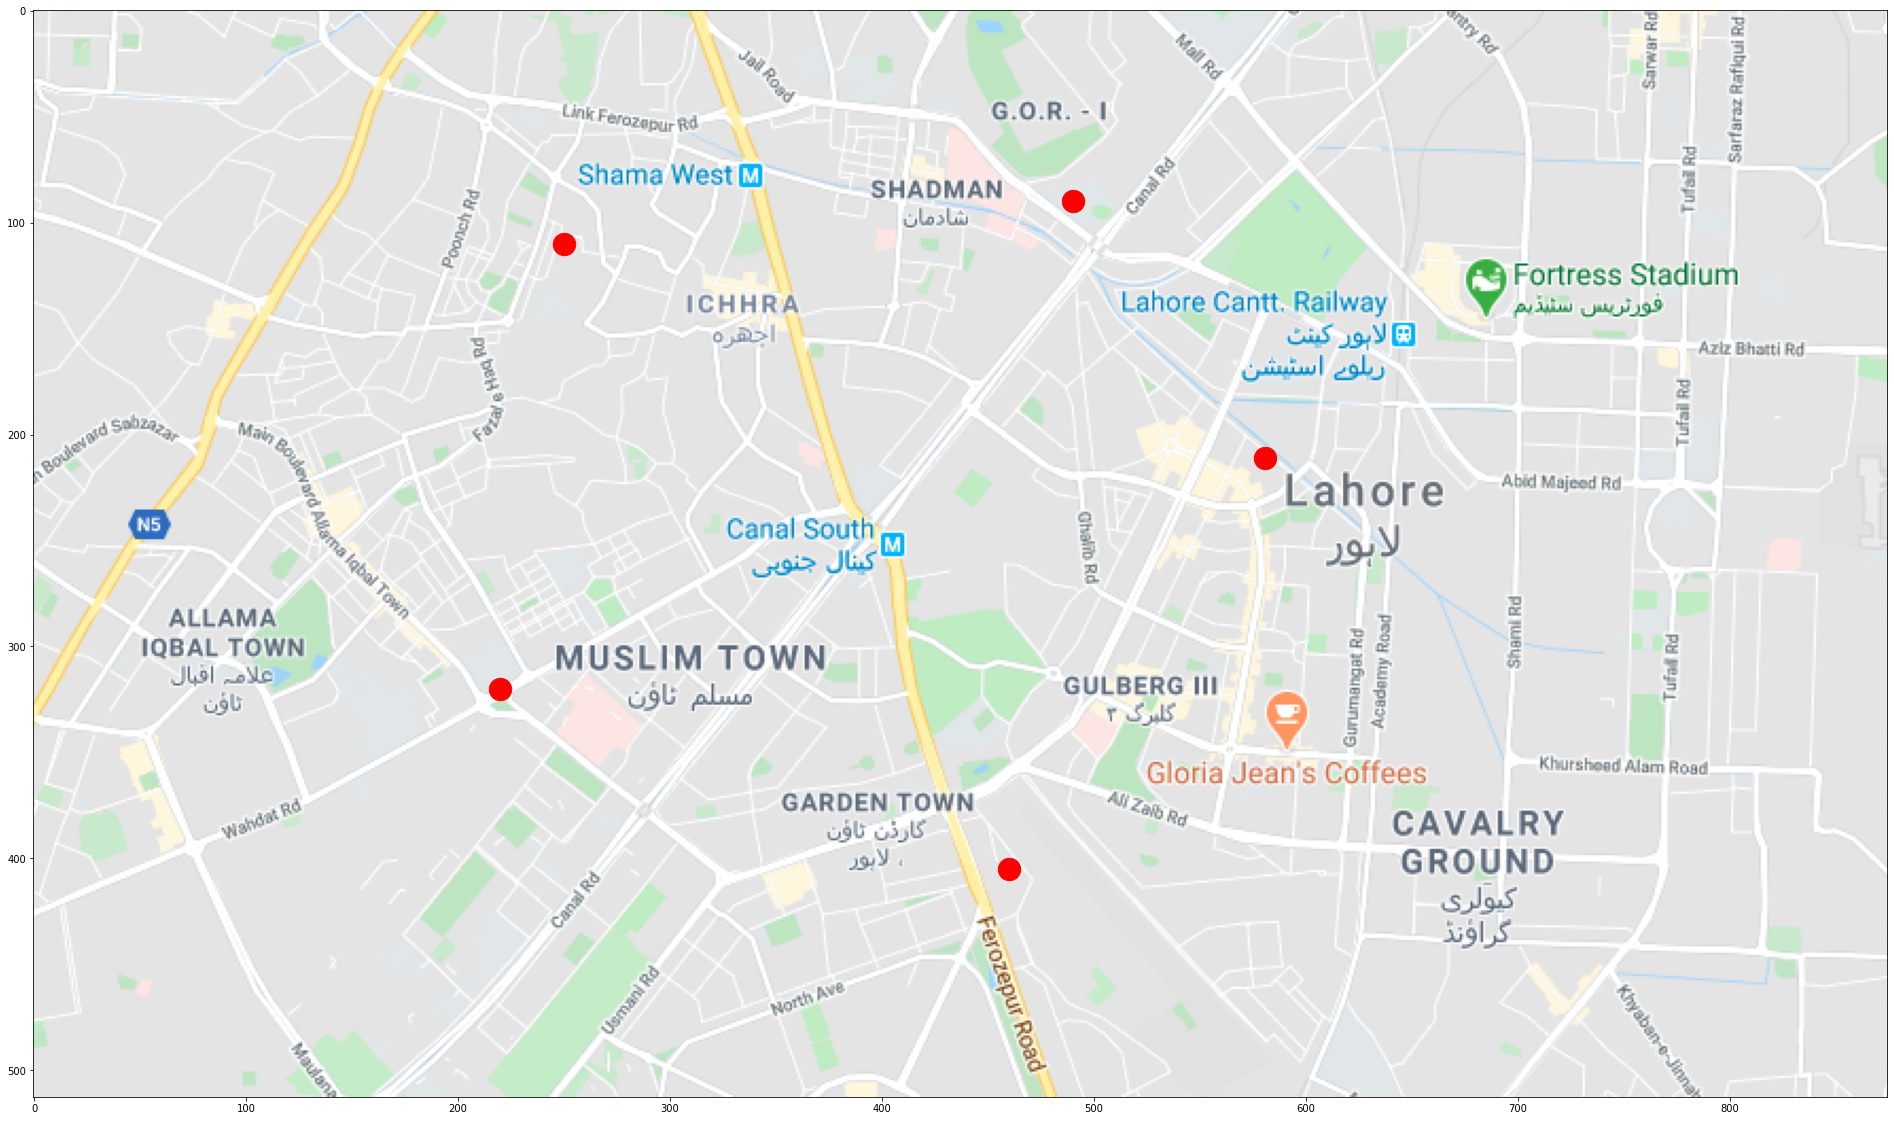

In [164]:
img=mpimg.imread('map_screenshot.png')
plt.figure(figsize=(40,20))
imgplot = plt.imshow(img)

crimes = [(220, 320), (250,110), (460, 405), (581, 211), (490, 90)]

for x, y in crimes:
    plt.scatter(x, y, s=500, c='red', marker='o')
plt.show()

In [132]:
heat_map_data = rossmo_map(k=110, f=0.05, g=0.01, b=250, imax=img.shape[0], jmax=img.shape[1], crimes=crimes)

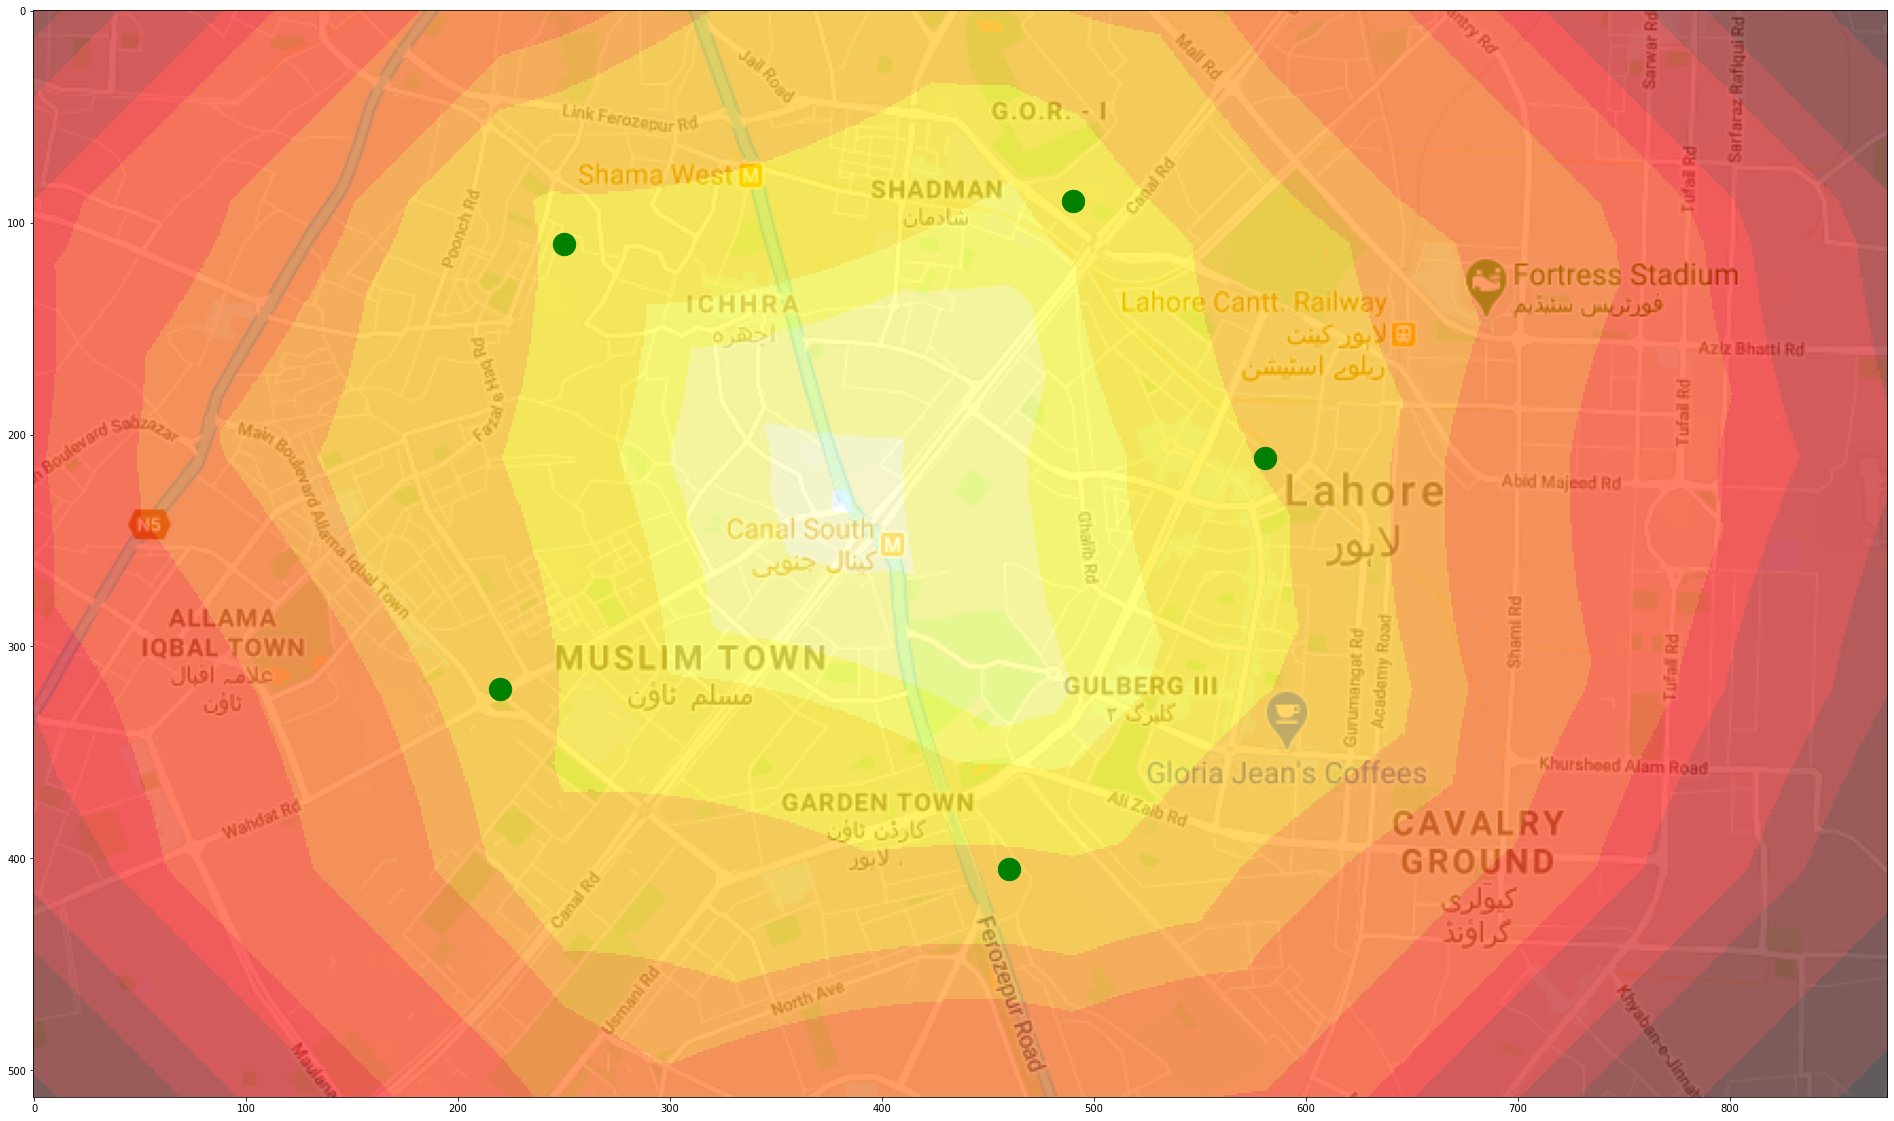

In [245]:
normalized = (heat_map_data * (255.0/heat_map_data.max())).astype(np.uint8)
plt.figure(figsize=(40,20))
plt.imshow(img)
plt.imshow(normalized, cmap='hot', interpolation='nearest', alpha=0.6)
for x, y in crimes:
    plt.scatter(x, y, s=500, c='green', marker='o')
plt.show()

### places and examples which helped me get here: 

- https://gist.github.com/George-Lee/942555

- https://gis.stackexchange.com/questions/192974/fill-array-with-coordinates-within-geographical-bounds-in-leaflet

- https://jeremykun.com/2011/07/20/serial-killers/

- https://stackoverflow.com/questions/46020894/how-to-superimpose-heatmap-on-a-base-image